# E1. LINEAR REGRESSION  INTERACTIONS - 6 VARIABLES

__1. Importing Libraries and Datasets__

__2. Data Preparation__

	2.1 Training Dataset
	2.2 Test Dataset

__3. Linear Regression__

__4. Model Evaluation : Training Metrics__

__5. Model Evaluation : Cross Validation__

__6. Model Evaluation : Test Dataset__

__7. Feature Importances__

__8. Residuals' Distribution__

__9. Scatterplots with fitted line (Train Dataset)__

__10. Saving Results__

## 1. Importing Libraries and Datasets

In [1]:
# Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [2]:
# Train Dataset

train_data = pd.read_csv("BG_Train_Dataset.csv") 
train_df = train_data.copy()
train_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,3.346,4.337,1.549,5.791,7.307,1,1,1,2,129


In [3]:
# Obtaining the train dataframe shape 

train_df.shape

(200, 10)

In [4]:
# Test Dataset

test_data = pd.read_csv("BG_Test_Dataset.csv") 
test_df = test_data.copy()
test_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,4.165,5.322,0.0,8.05,6.734,0,0,1,3,130


In [5]:
# Obtaining the test dataframe shape 

test_df.shape

(35, 10)

## 2. Data Preparation

### 2.1 Training Dataset

In [6]:
# Keeping the most important features

train_df = train_df[['Post Operative Glucose', 'Sex', 'Age', 'Pre Operative Fast', 'Cort', 
                     'Pre Operative Glucose', 'LV']]
train_df.head(1)

,Post Operative Glucose,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV
0,129,1,3.346,5.791,1,7.307,1


In [7]:
# Defining X_train and Y_train

Y_train = train_df['Post Operative Glucose']
X_train = train_df.drop('Post Operative Glucose', axis = 1)
X_train.head(1)

,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV
0,1,3.346,5.791,1,7.307,1


In [8]:
# Instantiating the Polynomial Features, adding only 2nd degree interactions

inter = PolynomialFeatures(degree = 2, interaction_only = True)

In [9]:
# Expanding the predictor space 

X_train_inter = inter.fit_transform(X_train)

In [10]:
# Binding it to a dataframe

X_train_inter_df = pd.DataFrame(data = X_train_inter, columns = [inter.get_feature_names_out(X_train.columns)])
X_train_inter_df.head()

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex Age,Sex Pre Operative Fast,Sex Cort,Sex Pre Operative Glucose,Sex LV,Age Pre Operative Fast,Age Cort,Age Pre Operative Glucose,Age LV,Pre Operative Fast Cort,Pre Operative Fast Pre Operative Glucose,Pre Operative Fast LV,Cort Pre Operative Glucose,Cort LV,Pre Operative Glucose LV
0,1.0,1.0,3.346,5.791,1.0,7.307,1.0,3.346,5.791,1.0,7.307,1.0,19.376686,3.346,24.449222,3.346,5.791,42.314837,5.791,7.307,1.0,7.307
1,1.0,1.0,4.302,7.283,0.0,7.952,1.0,4.302,7.283,0.0,7.952,1.0,31.331466,0.000,34.209504,4.302,0.000,57.914416,7.283,0.000,0.0,7.952
2,1.0,0.0,4.097,5.750,0.0,6.949,1.0,0.000,0.000,0.0,0.000,0.0,23.557750,0.000,28.470053,4.097,0.000,39.956750,5.750,0.000,0.0,6.949
3,1.0,1.0,3.892,6.731,0.0,6.376,1.0,3.892,6.731,0.0,6.376,1.0,26.197052,0.000,24.815392,3.892,0.000,42.916856,6.731,0.000,0.0,6.376
4,1.0,1.0,3.687,5.791,0.0,6.519,1.0,3.687,5.791,0.0,6.519,1.0,21.351417,0.000,24.035553,3.687,0.000,37.751529,5.791,0.000,0.0,6.519


In [11]:
# Shape of X

X_train_inter_df.shape

(200, 22)

In [12]:
# Displaying the column names of the dataframe

X_train_inter_df.columns

MultiIndex([(                                       '1',),
            (                                     'Sex',),
            (                                     'Age',),
            (                      'Pre Operative Fast',),
            (                                    'Cort',),
            (                   'Pre Operative Glucose',),
            (                                      'LV',),
            (                                 'Sex Age',),
            (                  'Sex Pre Operative Fast',),
            (                                'Sex Cort',),
            (               'Sex Pre Operative Glucose',),
            (                                  'Sex LV',),
            (                  'Age Pre Operative Fast',),
            (                                'Age Cort',),
            (               'Age Pre Operative Glucose',),
            (                                  'Age LV',),
            (                 'Pre Operative Fast Cort',

In [13]:
# Removing the unnecessary parts of the MultiIndex

inter_column_names = []
for i in range(0, len(X_train_inter_df.columns)):
    inter_column_names.append(X_train_inter_df.columns[i][0])
inter_column_names

['1',
 'Sex',
 'Age',
 'Pre Operative Fast',
 'Cort',
 'Pre Operative Glucose',
 'LV',
 'Sex Age',
 'Sex Pre Operative Fast',
 'Sex Cort',
 'Sex Pre Operative Glucose',
 'Sex LV',
 'Age Pre Operative Fast',
 'Age Cort',
 'Age Pre Operative Glucose',
 'Age LV',
 'Pre Operative Fast Cort',
 'Pre Operative Fast Pre Operative Glucose',
 'Pre Operative Fast LV',
 'Cort Pre Operative Glucose',
 'Cort LV',
 'Pre Operative Glucose LV']

In [14]:
# Displaying the training dataset

X_train = pd.DataFrame(data = X_train_inter, columns = inter_column_names)
X_train.head(1)

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex Age,Sex Pre Operative Fast,Sex Cort,Sex Pre Operative Glucose,Sex LV,Age Pre Operative Fast,Age Cort,Age Pre Operative Glucose,Age LV,Pre Operative Fast Cort,Pre Operative Fast Pre Operative Glucose,Pre Operative Fast LV,Cort Pre Operative Glucose,Cort LV,Pre Operative Glucose LV
0,1.0,1.0,3.346,5.791,1.0,7.307,1.0,3.346,5.791,1.0,7.307,1.0,19.376686,3.346,24.449222,3.346,5.791,42.314837,5.791,7.307,1.0,7.307


In [15]:
# Adding the "*" to denote multiplication

X_train = X_train.rename(columns={'Sex Age': 'Sex * Age', 
                        'Sex Pre Operative Fast': 'Sex * Pre Operative Fast',
                       'Sex Cort': 'Sex * Cort',
                        'Sex Pre Operative Glucose': 'Sex * Pre Operative Glucose',
                        'Sex LV': 'Sex * LV',
                        'Age Pre Operative Fast': 'Age * Pre Operative Fast',
                        'Age Cort': 'Age * Cort',
                        'Age Pre Operative Glucose': 'Age * Pre Operative Glucose',
                        'Age LV': 'Age * LV',
                        'Pre Operative Fast Cort': 'Pre Operative Fast * Cort',
                        'Pre Operative Fast Pre Operative Glucose': 'Pre Operative Fast * Pre Operative Glucose',
                        'Pre Operative Fast LV': 'Pre Operative Fast * LV',
                        'Cort Pre Operative Glucose': 'Cort * Pre Operative Glucose', 
                        'Cort LV': 'Cort * LV', 
                        'Pre Operative Glucose LV': 'Pre Operative Glucose * LV'})

In [16]:
# Displaying the expanded training dataset

X_train.head(1)

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex * Age,Sex * Pre Operative Fast,Sex * Cort,Sex * Pre Operative Glucose,Sex * LV,Age * Pre Operative Fast,Age * Cort,Age * Pre Operative Glucose,Age * LV,Pre Operative Fast * Cort,Pre Operative Fast * Pre Operative Glucose,Pre Operative Fast * LV,Cort * Pre Operative Glucose,Cort * LV,Pre Operative Glucose * LV
0,1.0,1.0,3.346,5.791,1.0,7.307,1.0,3.346,5.791,1.0,7.307,1.0,19.376686,3.346,24.449222,3.346,5.791,42.314837,5.791,7.307,1.0,7.307


### 2.2 Test Dataset

In [17]:
# Keeping the most features

test_df = test_df[['Post Operative Glucose', 'Sex', 'Age', 'Pre Operative Fast', 'Cort', 'Pre Operative Glucose', 
                   'LV']]
test_df.head(1)

,Post Operative Glucose,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV
0,130,0,4.165,8.05,0,6.734,1


In [18]:
# Defining X_test and Y_test

Y_test = test_df['Post Operative Glucose']
X_test = test_df.drop('Post Operative Glucose', axis = 1)
X_test.head(1)

,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV
0,0,4.165,8.05,0,6.734,1


In [19]:
# Expanding the predictor space 

X_test_inter = inter.fit_transform(X_test)

In [20]:
# Binding it to a dataframe

X_test_inter_df = pd.DataFrame(data = X_test_inter, columns = [inter.get_feature_names_out(X_test.columns)])
X_test_inter_df.head()

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex Age,Sex Pre Operative Fast,Sex Cort,Sex Pre Operative Glucose,Sex LV,Age Pre Operative Fast,Age Cort,Age Pre Operative Glucose,Age LV,Pre Operative Fast Cort,Pre Operative Fast Pre Operative Glucose,Pre Operative Fast LV,Cort Pre Operative Glucose,Cort LV,Pre Operative Glucose LV
0,1.0,0.0,4.165,8.050,0.0,6.734,1.0,0.000,0.000,0.0,0.000,0.0,33.528250,0.0,28.047110,4.165,0.0,54.208700,8.050,0.0,0.0,6.734
1,1.0,0.0,5.326,7.922,0.0,6.089,1.0,0.000,0.000,0.0,0.000,0.0,42.192572,0.0,32.430014,5.326,0.0,48.237058,7.922,0.0,0.0,6.089
2,1.0,1.0,4.848,5.709,0.0,8.453,1.0,4.848,5.709,0.0,8.453,1.0,27.677232,0.0,40.980144,4.848,0.0,48.258177,5.709,0.0,0.0,8.453
3,1.0,1.0,5.189,5.709,0.0,7.092,1.0,5.189,5.709,0.0,7.092,1.0,29.624001,0.0,36.800388,5.189,0.0,40.488228,5.709,0.0,0.0,7.092
4,1.0,0.0,3.824,5.791,0.0,8.023,1.0,0.000,0.000,0.0,0.000,0.0,22.144784,0.0,30.679952,3.824,0.0,46.461193,5.791,0.0,0.0,8.023


In [21]:
# Displaying the column names of the dataframe

X_test_inter_df.columns

MultiIndex([(                                       '1',),
            (                                     'Sex',),
            (                                     'Age',),
            (                      'Pre Operative Fast',),
            (                                    'Cort',),
            (                   'Pre Operative Glucose',),
            (                                      'LV',),
            (                                 'Sex Age',),
            (                  'Sex Pre Operative Fast',),
            (                                'Sex Cort',),
            (               'Sex Pre Operative Glucose',),
            (                                  'Sex LV',),
            (                  'Age Pre Operative Fast',),
            (                                'Age Cort',),
            (               'Age Pre Operative Glucose',),
            (                                  'Age LV',),
            (                 'Pre Operative Fast Cort',

In [22]:
# Removing the unnecessary parts of the MultiIndex

inter_column_names = []
for i in range(0, len(X_test_inter_df.columns)):
    inter_column_names.append(X_test_inter_df.columns[i][0])
inter_column_names

['1',
 'Sex',
 'Age',
 'Pre Operative Fast',
 'Cort',
 'Pre Operative Glucose',
 'LV',
 'Sex Age',
 'Sex Pre Operative Fast',
 'Sex Cort',
 'Sex Pre Operative Glucose',
 'Sex LV',
 'Age Pre Operative Fast',
 'Age Cort',
 'Age Pre Operative Glucose',
 'Age LV',
 'Pre Operative Fast Cort',
 'Pre Operative Fast Pre Operative Glucose',
 'Pre Operative Fast LV',
 'Cort Pre Operative Glucose',
 'Cort LV',
 'Pre Operative Glucose LV']

In [23]:
# Displaying the test dataset

X_test = pd.DataFrame(data = X_test_inter, columns = inter_column_names)
X_test.head(1)

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex Age,Sex Pre Operative Fast,Sex Cort,Sex Pre Operative Glucose,Sex LV,Age Pre Operative Fast,Age Cort,Age Pre Operative Glucose,Age LV,Pre Operative Fast Cort,Pre Operative Fast Pre Operative Glucose,Pre Operative Fast LV,Cort Pre Operative Glucose,Cort LV,Pre Operative Glucose LV
0,1.0,0.0,4.165,8.05,0.0,6.734,1.0,0.0,0.0,0.0,0.0,0.0,33.52825,0.0,28.04711,4.165,0.0,54.2087,8.05,0.0,0.0,6.734


In [24]:
# Adding the "*" to denote multiplication

X_test = X_test.rename(columns={'Sex Age': 'Sex * Age', 
                        'Sex Pre Operative Fast': 'Sex * Pre Operative Fast',
                       'Sex Cort': 'Sex * Cort',
                        'Sex Pre Operative Glucose': 'Sex * Pre Operative Glucose',
                        'Sex LV': 'Sex * LV',
                        'Age Pre Operative Fast': 'Age * Pre Operative Fast',
                        'Age Cort': 'Age * Cort',
                        'Age Pre Operative Glucose': 'Age * Pre Operative Glucose',
                        'Age LV': 'Age * LV',
                        'Pre Operative Fast Cort': 'Pre Operative Fast * Cort',
                        'Pre Operative Fast Pre Operative Glucose': 'Pre Operative Fast * Pre Operative Glucose',
                        'Pre Operative Fast LV': 'Pre Operative Fast * LV',
                        'Cort Pre Operative Glucose': 'Cort * Pre Operative Glucose', 
                        'Cort LV': 'Cort * LV', 
                        'Pre Operative Glucose LV': 'Pre Operative Glucose * LV'})

In [25]:
# Displaying the expanded test dataset

X_test.head(1)

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex * Age,Sex * Pre Operative Fast,Sex * Cort,Sex * Pre Operative Glucose,Sex * LV,Age * Pre Operative Fast,Age * Cort,Age * Pre Operative Glucose,Age * LV,Pre Operative Fast * Cort,Pre Operative Fast * Pre Operative Glucose,Pre Operative Fast * LV,Cort * Pre Operative Glucose,Cort * LV,Pre Operative Glucose * LV
0,1.0,0.0,4.165,8.05,0.0,6.734,1.0,0.0,0.0,0.0,0.0,0.0,33.52825,0.0,28.04711,4.165,0.0,54.2087,8.05,0.0,0.0,6.734


## 3. Linear Regression

In [26]:
# Fitting the model and printing summary

MLRmodel = sm.OLS(Y_train, X_train).fit()
print(MLRmodel.summary())

                              OLS Regression Results                              
Dep. Variable:     Post Operative Glucose   R-squared:                       0.450
Model:                                OLS   Adj. R-squared:                  0.385
Method:                     Least Squares   F-statistic:                     6.928
Date:                    Wed, 24 Jul 2024   Prob (F-statistic):           2.35e-14
Time:                            14:15:43   Log-Likelihood:                -925.05
No. Observations:                     200   AIC:                             1894.
Df Residuals:                         178   BIC:                             1967.
Df Model:                              21                                         
Covariance Type:                nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## 4. Model Evaluation : Training Metrics

In [27]:
# Getting predictions and training error metrics for Linear Regression

MLRpredictions = MLRmodel.predict(X_train)

MLR_Tr_MAE = np.round(mean_absolute_error(Y_train, MLRpredictions),2)


In [28]:
# Dictionary that holds the information of R^2, adjusted R^2, F-statistic value, number of predictors 
# and training error metric values 

dict1 = {'Linear Regression with Interactions (6 Variables)': (np.round(MLRmodel.rsquared,3),np.round(MLRmodel.rsquared_adj,3), 
                 np.round(MLRmodel.fvalue,2), 
                 np.round(len(X_train.columns),3),
                 MLR_Tr_MAE)}

In [29]:
# Creating a dataframe to easily present the results 

Training_metric_df = pd.DataFrame(dict1, index=['R^2','adj.R^2','F-stat', 
                                               'Num_of_Feats', 'Tr_MAE'])

In [30]:
# Displaying the training evaluation metrics

Training_metric_df

,Linear Regression with Interactions (6 Variables)
R^2,0.450
adj.R^2,0.385
F-stat,6.930
Num_of_Feats,22.000
Tr_MAE,17.230


## 5. Model Evaluation : Cross Validation

In [31]:
# Using the KFold function for cross-validation

cv = KFold(n_splits = 5, shuffle = True, random_state = 126)

In [32]:
# Function that calculates the cross validated test MAE and MAPE 

def cv_scores(X,Y, model,cv):
        
    cv_MAE = round(np.mean(cross_val_score(model, X, Y, cv=cv, 
                                       scoring='neg_mean_absolute_error', 
                                           error_score='raise') * (-1)),2)

    
    score = cv_MAE
    return score

In [33]:
# Dictionary that holds the information of the cross validated test MAE and MAPE 

dict2 = {'Linear Regression with Interactions (6 Variables)':cv_scores(X_train,Y_train,LinearRegression(),cv)}

In [34]:
# Creating a dataframe to easily present the results 

Test_CV_results = pd.DataFrame(dict2, index=['Te_MAE (KFold)'])

In [35]:
# Displaying the cross validated test error results

Test_CV_results

,Linear Regression with Interactions (6 Variables)
Te_MAE (KFold),20.9


## 6. Model Evaluation : Test Dataset

In [36]:
# Defining X_test and Y_test

Y_test = test_df['Post Operative Glucose']
X_test = test_df.drop('Post Operative Glucose', axis = 1)
X_test.head(1)

,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV
0,0,4.165,8.05,0,6.734,1


In [37]:
X_test_inter = inter.fit_transform(X_test)
X_test_inter_df = pd.DataFrame(data = X_test_inter, columns = [inter.get_feature_names_out(X_test.columns)])

inter_column_names = []
for i in range(0, len(X_test_inter_df.columns)):
    inter_column_names.append(X_test_inter_df.columns[i][0])

X_test = pd.DataFrame(data = X_test_inter, columns = inter_column_names)
X_test.head()

,1,Sex,Age,Pre Operative Fast,Cort,Pre Operative Glucose,LV,Sex Age,Sex Pre Operative Fast,Sex Cort,Sex Pre Operative Glucose,Sex LV,Age Pre Operative Fast,Age Cort,Age Pre Operative Glucose,Age LV,Pre Operative Fast Cort,Pre Operative Fast Pre Operative Glucose,Pre Operative Fast LV,Cort Pre Operative Glucose,Cort LV,Pre Operative Glucose LV
0,1.0,0.0,4.165,8.050,0.0,6.734,1.0,0.000,0.000,0.0,0.000,0.0,33.528250,0.0,28.047110,4.165,0.0,54.208700,8.050,0.0,0.0,6.734
1,1.0,0.0,5.326,7.922,0.0,6.089,1.0,0.000,0.000,0.0,0.000,0.0,42.192572,0.0,32.430014,5.326,0.0,48.237058,7.922,0.0,0.0,6.089
2,1.0,1.0,4.848,5.709,0.0,8.453,1.0,4.848,5.709,0.0,8.453,1.0,27.677232,0.0,40.980144,4.848,0.0,48.258177,5.709,0.0,0.0,8.453
3,1.0,1.0,5.189,5.709,0.0,7.092,1.0,5.189,5.709,0.0,7.092,1.0,29.624001,0.0,36.800388,5.189,0.0,40.488228,5.709,0.0,0.0,7.092
4,1.0,0.0,3.824,5.791,0.0,8.023,1.0,0.000,0.000,0.0,0.000,0.0,22.144784,0.0,30.679952,3.824,0.0,46.461193,5.791,0.0,0.0,8.023


In [38]:
X_test.shape

(35, 22)

In [39]:
# Getting predictions

MLR_predictions = MLRmodel.predict(X_test)

In [40]:
# Getting Test Metrics

MLR_Te_MAE = round(mean_absolute_error(Y_test, MLR_predictions),2)

In [41]:
# Dictionary that holds the information of test MAE and MAPE of each model

dict3 = {'Linear Regression with Interactions (6 Variables)':[MLR_Te_MAE]}

In [42]:
# Creating a dataframe to easily present the results 

Test_Dat_results = pd.DataFrame(dict3, index=['Te_MAE'])

In [43]:
# Displaying the test error results

Test_Dat_results

,Linear Regression with Interactions (6 Variables)
Te_MAE,19.4


## 7. Feature Importances

In [44]:
# load JS visualization code to notebook

shap.initjs()

In [45]:
# Instantiating and fitting the model 

model = LinearRegression()
model.fit(X_train, Y_train);

In [46]:
# Creating the explainer

explainer = shap.LinearExplainer(model, X_train)

In [47]:
# Calculate Shapley values for the data

shap_values = explainer(X_train)

In [48]:
# Picking a color for the graphs

color = 'red'

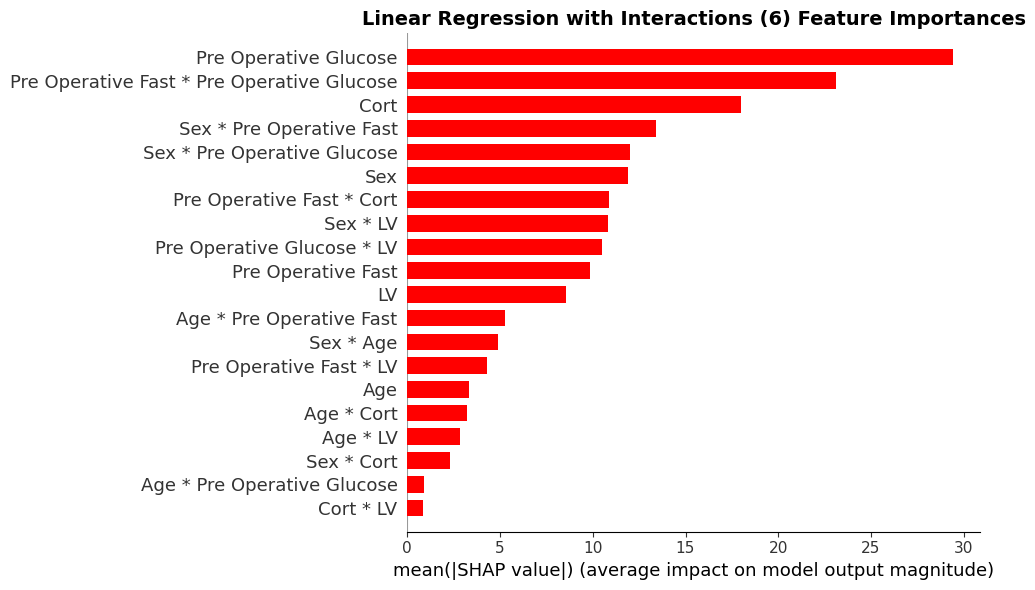

In [49]:
# Summary plot to visualize feature importance

plt.title(label = "Linear Regression with Interactions (6) Feature Importances" , fontsize = 14, weight = 'bold')

shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, 
                  plot_type='bar', 
                  color=color , plot_size= (10,6), show_values_in_legend = True)

plt.show()

## 8. Residuals' Distribution

In [50]:
# model fitted values

fitted_y1 = MLRmodel.fittedvalues

# model residuals
residuals1 = MLRmodel.resid

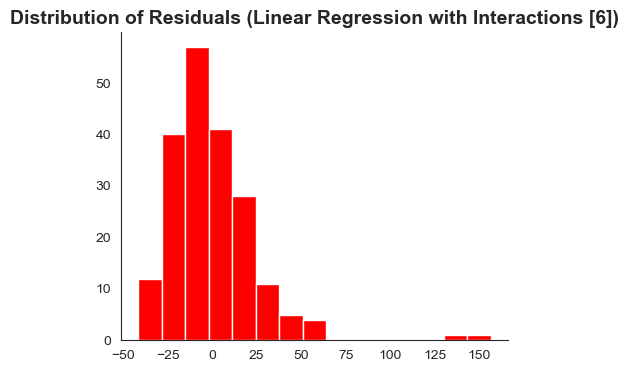

In [51]:
# Histogram of residuals 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals1, bins = 15, color = color)
    
plt.title(label = "Distribution of Residuals (Linear Regression with Interactions [6])" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

## 9. Scatterplots with fitted line (Train Dataset)

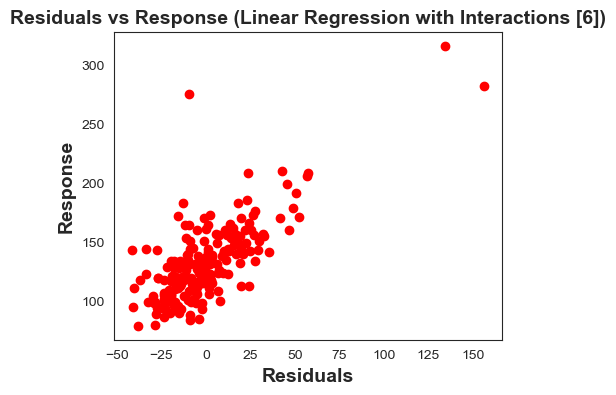

In [52]:
# Plotting residuals vs response 

sns.set_style("white")

plt.figure(figsize=(5,4))

plt.plot(residuals1, Y_train, 'o', color = color)

# Uncomment the following lines to add a fitted line
#b,a = np.polyfit(residuals1, Y_train, 1)

# plt.plot(residuals1, b*residuals1 + a, color = 'black')

plt.title(label = 'Residuals vs Response (Linear Regression with Interactions [6])', fontsize = 14, weight = 'bold')
plt.xlabel('Residuals',fontsize = 14, weight = 'bold')
plt.ylabel('Response',fontsize = 14, weight = 'bold')


plt.show()

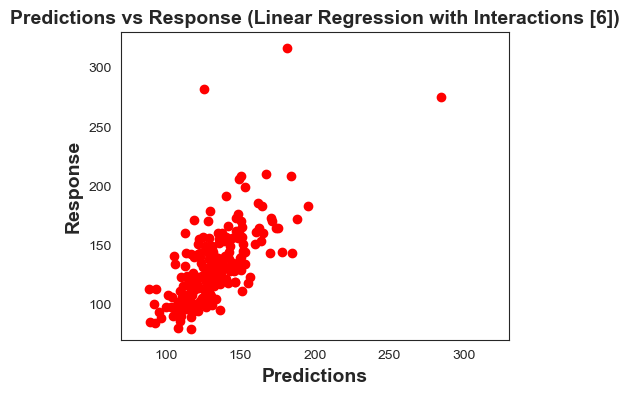

In [53]:
# Plotting predictions vs response 

sns.set_style("white")

plt.figure(figsize=(5,4))

plt.plot(MLRpredictions, Y_train, 'o', color = color)

# Uncomment the following lines to add a fitted line
# b,a = np.polyfit(MLRpredictions, Y_train, 1)

# plt.plot(MLRpredictions, b*MLRpredictions + a, color = 'black')

plt.title(label = 'Predictions vs Response (Linear Regression with Interactions [6])', fontsize = 14, weight = 'bold')
plt.xlabel('Predictions',fontsize = 14, weight = 'bold')
plt.ylabel('Response',fontsize = 14, weight = 'bold')

plt.xlim(70, 330)
plt.ylim(70, 330)

plt.show()

## 10. Saving Results

In [54]:
# Concatenating the training and test Dataframes

LinearModelsResultsInteractions = pd.concat([Training_metric_df, Test_CV_results,Test_Dat_results], axis =  0)
LinearModelsResultsInteractions

,Linear Regression with Interactions (6 Variables)
R^2,0.450
adj.R^2,0.385
F-stat,6.930
Num_of_Feats,22.000
Tr_MAE,17.230
Te_MAE (KFold),20.900
Te_MAE,19.400


In [55]:
# Saving the Results

LinearModelsResultsInteractions.to_csv(r'LinearModelsResultsWithInteractions(6).csv', index=True, index_label = 'Metric')